In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from models.nets import MLP
import pylab as pl

from utils.train import basic_train

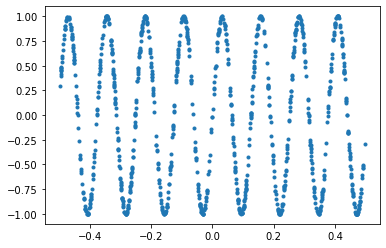

In [131]:
# Generate data
N = 1000
x = torch.rand((N, )) - 0.5
y = torch.sin(50*x)

pl.plot(x, y, '.')
pl.show()

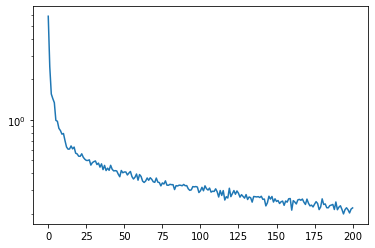

In [227]:
# Train loop
from IPython.display import clear_output
net = MLP.MLP(1, 1, hidden_size=64, mlp_blocks=10, dropout=0.01, skip=True, activation=nn.ReLU())

optimizer = torch.optim.Adam(net.parameters(), 1e-3, weight_decay=0)
criterion = nn.MSELoss()
losses = []
epochs = 300
for epoch in range(epochs):
    y_pred = net(x.view(-1, 1))
    loss = criterion(y_pred.ravel(), y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        clear_output(True)
        pl.plot(losses)
        pl.yscale("log")
        pl.show()

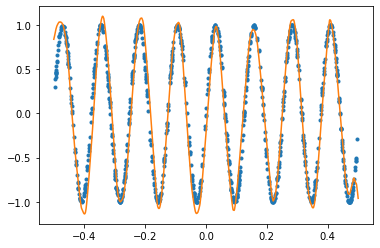

In [229]:
net.eval()
pl.plot(x, y, '.')
t = torch.linspace(-0.5, 0.5, 1000)
pl.plot(t, net(t.view(-1, 1)).ravel().detach())
pl.show()